In [159]:
import csv
import numpy as np
import seaborn as sns
import pandas as pd

https://seaborn.pydata.org/examples/simple_violinplots.html


In [160]:
! sh ~/Projects/coursework/mpi_collective/copy_txt_to_local.sh
! rm -rf ./txt_barrier
! rm -rf ./txt_alltoall
! cp -r ~/Projects/coursework/mpi_collective/txt_barrier ./txt_barrier
! cp -r ~/Projects/coursework/mpi_collective/txt_alltoall ./txt_alltoall
! ls

   Lomonosov-2 supercomputer welcomes you!


barrier.txt                                   100% 6868   319.1KB/s   00:00    
barrier.csv                                   100% 3143   101.6KB/s   00:00    
   Lomonosov-2 supercomputer welcomes you!


alltoall.csv                                  100%    0     0.0KB/s   00:00    
alltoall.txt                                  100%    0     0.0KB/s   00:00    
Untitled.ipynb txt_alltoall   txt_barrier


In [161]:
def print_results(test_type):
    txt_path = f"./txt_{test_type}/{test_type}.txt"
    csv_path = f"./txt_{test_type}/{test_type}.csv"

    with open(txt_path, "r") as txt_file:
        for row in txt_file:
            if row.startswith(test_type):
                print(row, end="")
        
    print()

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            mean = sum(a)/len(a)
            xmin = min(a)
            xmax = max(a)
            
            print(f'{timestr}\n{a}\nmean = {mean}\nmin = {xmin}\nmax = {xmax}\n')
    
    

In [162]:
print_results("barrier")
print(f"\n{'-' * 70}\n")
print_results("alltoall")

barrier,8000,3.595080e+02,2022-04-27,22:55:37,23:01:37
barrier,8000,3.297831e+02,2022-04-27,23:02:14,23:07:44
barrier,8000,5.631442e-02,2022-04-27,23:25:54,23:25:54
barrier,8000,5.693811e-02,2022-04-27,23:26:52,23:26:52
barrier,75500,5.040676e-01,2022-04-27,23:31:33,23:31:34
barrier,75500,5.080952e-01,2022-04-27,23:32:09,23:32:10
barrier,200000,1.514067e+00,2022-04-27,23:52:40,23:52:41
barrier,200000,1.530362e+00,2022-04-27,23:53:16,23:53:18
barrier,200000,1.591142e+00,2022-04-27,00:02:00,00:02:02
barrier,200000,1.532515e+00,2022-04-27,00:02:31,00:02:33
barrier,200000,1.337498e+00,2022-04-27,00:21:03,00:21:05
barrier,200000,1.345487e+00,2022-04-27,00:21:59,00:22:01
barrier,100000,7.880213e-01,2022-04-27,00:31:59,00:32:00
barrier,100000,7.897318e-01,2022-04-27,00:32:49,00:32:50
barrier,100000,2.332449e-01,2022-04-27,01:14:30,01:14:30
barrier,100000,4.359023e-01,2022-04-27,01:15:06,01:15:06
barrier,100000,2.370329e-01,2022-04-27,01:16:09,01:16:10

23:01:37
[3.518299, 3.6789, 3.6216, 3.74

In [163]:
def get_results_data(test_type):
    csv_path = f"./txt_{test_type}/{test_type}.csv"

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        data = {}
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            data[timestr] = a
        return data

In [164]:
all_data = get_results_data("barrier")
# all_data = get_results_data("alltoall")
sep_data = {}
for time in all_data:
    arr = all_data[time]
    num = len(arr)
    if not (num in sep_data):
        sep_data[num] = {}
    sep_data[num][time] = arr
    

for d in sep_data.keys():
    print(f"key {d}: {len(sep_data[d])} elements")
    
data = pd.DataFrame(sep_data[20])
data_mean = pd.DataFrame(data.mean(axis=0), columns=['mean'])
data

key 10: 11 elements
key 20: 6 elements


,23:52:41,23:53:18,00:02:02,00:02:33,00:21:05,00:22:01
0,7.760249,7.921959,8.158129,7.824403,6.944488,7.079084
1,7.571617,7.586212,7.933521,7.605248,6.631204,6.682072
2,7.573379,7.752484,7.952435,7.586452,6.660480,6.707041
3,7.602936,7.594086,7.928015,7.577430,6.661096,6.714942
4,7.571122,7.623658,8.043678,7.617231,6.773167,6.664873
5,7.674708,7.591435,7.954257,7.570479,6.668444,6.773078
6,7.502235,7.618730,7.945228,7.776024,6.653641,6.695880
7,7.545342,7.794681,8.027268,7.595664,6.668201,6.687718
8,7.511021,7.608725,7.923704,7.783863,6.659189,6.664718
9,7.515487,7.540797,7.917481,7.760239,6.652377,6.684102


In [165]:
min_value = 1000
max_value = 0

for column_name in data:
    column_min_value = min(data[column_name])
    if (min_value > column_min_value):
        min_value = column_min_value
        
    column_max_value = max(data[column_name])
    if (max_value < column_max_value):
        max_value = column_max_value
        
print(f"min value = {min_value}\nmax value = {max_value}")

min value = 6.585391
max value = 8.158129


[(6.385391, 8.358129), (-0.5, 5.5)]

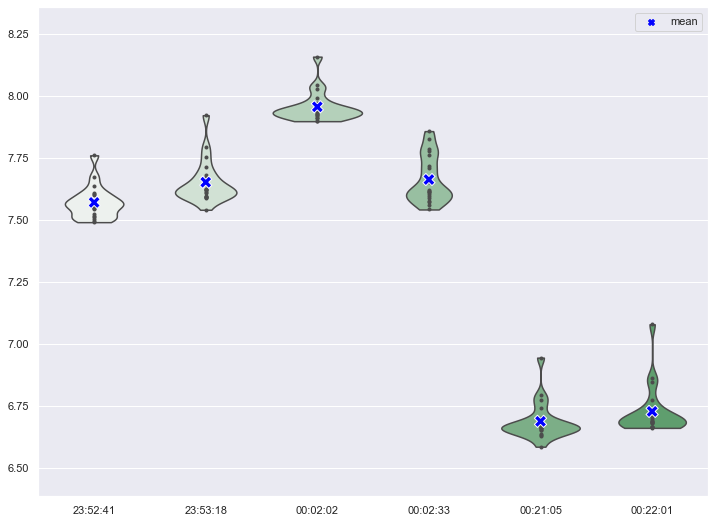

In [166]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12, 9)})
sns.violinplot(data=data, palette="light:g", cut=0, inner="points", bw=0.3)
sns.scatterplot(data=data_mean, palette=['blue'], s=150, markers=['X'])\
.set(xlim=(-0.5, len(data.columns)-0.5), ylim=(min_value-0.2, max_value+0.2))

In [167]:
! cp ./Untitled.ipynb ~/Projects/coursework/mpi_collective/Untitled.ipynb

In [9]:
! jt -l
! jt -h

usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]

optional arguments:
  -h, --help            show this help message and exit
  -l, --list            list available themes
  -t THEME, --theme THEME
                        theme name to install
  -f MONOFONT, --monofont MONOFONT
                        monospace code font
  -fs MONOSIZE, --monosize MONOSIZE
                        code font-size
  -nf NBFONT, --nbfont NBFONT
                        notebook font
  -nfs NBFONTSIZE, --nbfontsize NBFONTSIZE
                        notebook fontsize
  -tf TCFONT, --tcfont TCFONT
                        txtcell font
  -tfs TCFONTSIZE, --tcfontsize TCF

In [11]:
! jt -r
! jt -t monokai -T -N

Reset css and font defaults in:
/Users/gleb/.jupyter/custom &
/Users/gleb/Library/Jupyter/nbextensions


In [132]:
print("workers: {}".format(int(69000 / 2 / (13 + 12 * 2 + 10 * 4))))
print("pickaxe: {}".format(int(129000 / (60 * 4))))

workers: 448
pickaxe: 537


In [158]:
# u - число узлов для запуска
# p - число процессов на узел

b = lambda u, p: f"nohup ./launch_script_barrier.sh    {u} {p} 1 5s 100000 10000 &"
b1 = lambda u, p: f"nohup ./launch_script_barrier_x1.sh {u} {p} 1 5s 100000 10000 &"

for u in [1, 2, 4, 8, 16]:
    for p in [1, 2, 3, 4]:
        print(b(u, p))
        print(b1(u, p))

nohup ./launch_script_barrier.sh    1 1 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 1 1 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    1 2 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 1 2 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    1 3 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 1 3 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    1 4 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 1 4 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    2 1 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 2 1 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    2 2 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 2 2 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    2 3 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 2 3 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    2 4 1 5s 100000 10000 &
nohup ./launch_script_barrier_x1.sh 2 4 1 5s 100000 10000 &
nohup ./launch_script_barrier.sh    4 1 